In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
noise = np.random.rand(len(x_data))

In [7]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [10]:
y_true = (0.5 * x_data) + 5 + noise

In [14]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [16]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [18]:
y_df.head()

,Y
0,5.378508
1,5.464006
2,5.015937
3,5.478129
4,5.971123


In [19]:
my_data = pd.concat([x_df,y_df],axis=1)

In [21]:
my_data.head()

,X Data,Y
0,0.00000,5.378508
1,0.00001,5.464006
2,0.00002,5.015937
3,0.00003,5.478129
4,0.00004,5.971123


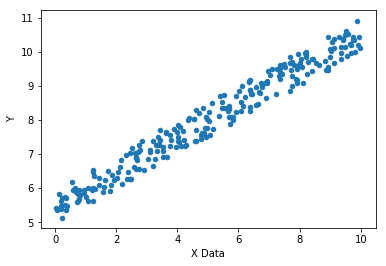

In [22]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y')

In [77]:
batch_size = 8

In [64]:
np.random.randn(2)

array([-1.28798971, -0.73656785])

In [78]:
m = tf.Variable(0.45)
b = tf.Variable(1.65)

In [79]:
xph = tf.placeholder(tf.float32,[batch_size])

In [80]:
yph = tf.placeholder(tf.float32,[batch_size])

In [81]:
y_model = m*xph + b

In [82]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [83]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [84]:
init = tf.global_variables_initializer()

In [90]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m , model_b = sess.run([m,b])

In [91]:
model_m

0.49797314

In [92]:
model_b

5.4345803

In [93]:
y_hat = x_data*model_m + model_b

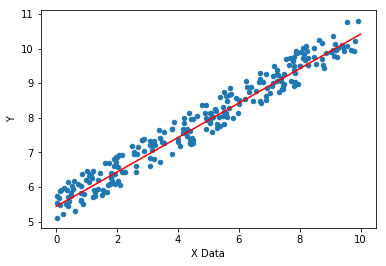

In [97]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator